# Week 2

## Overview

Ok, so we've made it to week 2. Today's lecture has 4 parts. 
* First, we'll go over some practical information. 
* Then we'll do a little data visualization exercise (which we'll come back to later in the semester). 
* Now, the emain event is to work with crime-data and generate some informative plots. 
* Finally - in part 4 - we'll play around with visualizing the geo-data contained in the CSV file.

## Part 1: Some practical things

The videos below contain important practical information, so - although I covered most of this in class last week - I recommend you watch them (it's sometimes good to hear things a second time). You don't necessarily have to start by watching these - it's something you can do if you need a break from coding

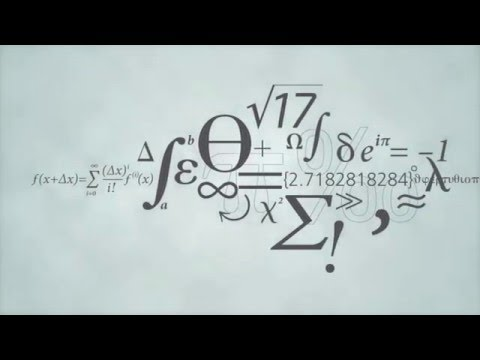

In [1]:
# Video 1. The structure of the course
from IPython.display import YouTubeVideo
YouTubeVideo("42KjmxgYYNI",width=800, height=450)

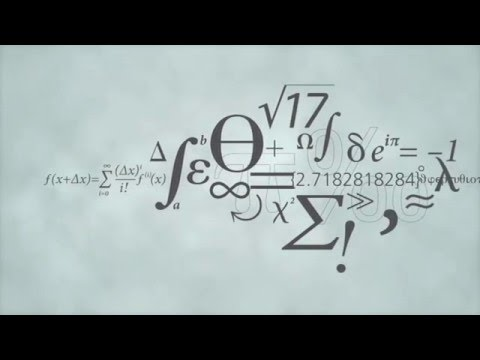

In [2]:
# Video 2: The assignments
YouTubeVideo("sSQBcbQ3FL0",width=800, height=450)

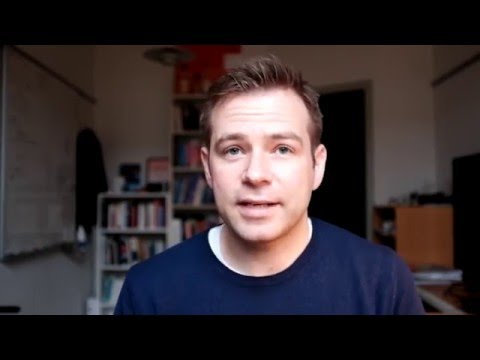

In [3]:
# Video 3. Peer evaluations
YouTubeVideo("-TC18KgpiIQ",width=800, height=450)

## Part 2: A little visualization exercise


> _Exercise_: Chapter 5 (beyond the book)
> 
> Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
> Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  
>
> It's ok to just download these files to disk by right-clicking on each one, but if you use Python and _urllib_ or _urllib2_ to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that _stackoverflow_ is your friend.
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
> * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 
> * Now calculate the variance for all of the various sets of $x$- and $y$-values (to three decimal places).
> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/anscombe.png).)
> * Explain - in your own words - what you think my point with this exercise is.


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

## Part 3: Working with the dataset 

There's no data science without data, so we'll start thinking about ways to acquire data. You've already played around with reading/writing text from files. The exercises today focus on our big CSV file. 

Let's start by think a bit more about the crime-data file from San Francisco that you downloaded last week. The file has may columns, and today we'll be working with 

- The various categories of crimes
- Crime over the years
- What time of day do crimes occur?
- And do certain crime-types tend to happen in specific neighborhoods?
- We'll play around with geo-data.  

All of this can be easily calculated based on the columns in the incident file. 

> *Mini Exercise*:
>
> * Which columns from the CSV file will you need to work on the topics mentioned above?
> * And a little calculation: What is the total number of incidents in the CSV file?


In order to do awesome _predictive policing_ later on in the class, we're going to dissect the SF crime-data quite thoroughly to figure out what has been going on over the last 10 years on the San Francisco crime scene. It's going to be a lot of work ... but after mastering these exercises you guys will have some real data science skills! 

---
> _Exercise_: The types of crime and their popularity over time. The first field we'll dig into is the column "Category".
> * Use `pandas` to list and then count all the different categories of crime in the dataset. How many are there? 
> * Now count the number of occurrences of each category in the dataset. What is the most commonly occurring category of crime? What is the least frequently occurring?
> * Create a histogram over crime occurrences. Mine looks like this
>   ![Histogram](https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/categories.png)
> * Now it's time to explore how the crime statistics change over time. To start off easily, let's count the number of crimes per year for the years 2003-2017 (since we don't have full data for 2018). What's the average number of crimes per year? 
> * Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below (for convenient copy-paste action). Now create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.
> 

In [4]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

> * My plot looks like this for the 14 focus crimes:
    ![Histograms](https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/time.png)
>    
> (Note that titles are OVER the plots and the axes on the bottom are common for all plots.) 
> * Comment on at least three interesting trends in your plot. 
>    
> Also, here's a fun fact: The drop in car thefts is due to new technology called 'engine immobilizer systems' - get the full story [here](https://www.nytimes.com/2014/08/12/upshot/heres-why-stealing-cars-went-out-of-fashion.html). 
    
    

There's much more to work on in this dataset (for example, I also explored if certain crimes tend to happen on certain week-days ... [also some interesting patterns there!](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/weekdays.png)), but we have lots to do, so we must rush onwards. 

The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco.

> _Exercises_: The types of crime and how they take place across San Francisco's police districts.
>  
>  * So now we'll be combining information about _PdDistrict_ and _Category_ to explore differences between SF's >neighborhoods. First, simply list the names of SF's 10 police districts.
>  * Which has the most crimes? Which has the most focus crimes?
>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes >that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. > That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/categoryhist.png). Let's call it `P(crime)`.
>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
>    - For each district plot these ratios for the 14 focus crimes. My plot looks like this
>      ![Histograms](https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/conditional.png)
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?
>    - Even though we only plotted the ratios for our 14 focus crimes, I asked you to calculate the ratios based on all crime categories. Why do you think I wanted to include all crime types in the calculation?

## Part 4: Visualizing geo-data

Finally, we will draw on the fact that the crime data has lots of exciting coordinatees attached. We'll work with [Folium](https://anaconda.org/conda-forge/folium) for plotting the GPS data. Folium is cool and plays nicely with Pandas - but it's also a new framework and not so super well documented, so a little patience may be required.

The exercise below is based on this nice [tutorial](https://alysivji.github.io/getting-started-with-folium.html)), so you might want to take a look at that for extra context.

> *Exercise*: A bit a plotting
> 
> * First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command `folium.Map([lat, lon], zoom_start=13)`, where you'll have to look up San Francisco's longitude and latitude.
> * Next, use the the coordinates for SF City Hall `37.77919 -122.41914` and [this other tutorial](https://boostlog.io/@faisalnad/creating-beautiful-webmaps-in-python-5b01342e47018500491f490e) draw a circle around city hall with a nice pop-up.
> ![example](https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/city_hall.png)
> Now, let's try to play with heatmaps. Select a couple of months of data (for example, June-July 2016) for `'DRUG/NARCOTIC'` and a month for `'LARCENY/THEFT'`. Using commands from the main [tutorial](https://alysivji.github.io/getting-started-with-folium.html)) 
>    * Create a heatmap of all arrests for `'DRUG/NARCOTIC'` during June-July 2016.
>    * Create a heatmap of all arrests for `'LARCENY/THEFT'` during June-July 2016.
>    * Comment on the differences.
> My plot look like this (you figure out which is which)
> ![maps](https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/maps.png)

Feel free to play around with more funky heatmaps. Isn't it fun to be able to play around with maps?

(Credit: TA Germans has helped develop this exercise; 